In [3]:
import numpy as np
import matplotlib.pyplot as pt
% matplotlib inline

In [69]:
n=40

In [70]:
def GCLmesh(n):
    mesh = np.zeros(n)
    for j in range(0,n):
        xj = np.cos(j*np.pi/n)
        mesh[j] = xj
    return mesh

In [71]:
mesh = GCLmesh(n)

In [72]:
def chebyDiffMatrix(n, mesh):
	d_mat = np.zeros((n,n))
	for i in range(0,n):
		for j in range(0,n):
			if(i==0 and j==0):
				entry = (2*(n**2) + 1)/6
			elif(i==n-1 and j==n-1):
				entry = - (2*(n**2) + 1)/6
			elif (i==j):
				entry = -mesh[j]/(2*( 1-(mesh[j]**2) ) )
			else:
				ci = 2 if (i==0 or i==n) else 1
				cj = 2 if (j==0 or j==n) else 1
				entry = (ci/cj) * ( ((-1)**(i+j)) / (mesh[i] - mesh[j]) )
			d_mat[i,j] = entry
	return d_mat

In [74]:
D = chebyDiffMatrix(n, mesh)

In [75]:
def f(x):
	return np.exp(x)*np.sin(5*x);

def true_f_prime(x):
	return np.exp(x)*( 5*np.cos(5*x) + np.sin(5*x) );

In [76]:
approx_sol = D.dot(f(mesh))

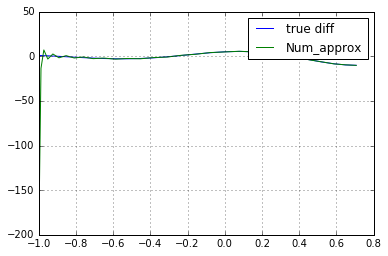

In [80]:
pt.plot(mesh[10:], true_f_prime(mesh)[10:], label="true diff")
pt.plot(mesh[10:], approx_sol[10:], label = "Num_approx")
pt.grid()
pt.legend()